# Moore's law

Use the scripts from: https://github.com/preshing/analyze-spec-benchmarks to download a large amount of data relating to CPU specs. The script might take as long as an hour, depending on your connection speed.

This will save the data in the following format:

testID,benchName,base,peak\ cpu95-19990104-03254,101.tomcatv,19.4,27.1\ cpu95-19990104-03254,102.swim,27.2,34.8\ cpu95-19990104-03254,103.su2cor,10.1,9.98\ cpu95-19990104-03254,104.hydro2d,8.58,8.61

Now do the following:

- Extract the date and base speed for a benchmark of your choice
- Plot the data in a semi-log plot
- Now train a linear model to fit your plot.
- How well is Moore’s law holding up?

                  testID  base       date
0   cpu95-19990104-03254  19.4 1999-01-04
26  cpu95-19990118-03258  19.5 1999-01-18
44  cpu95-19990122-03281  35.3 1999-01-22
54  cpu95-19990122-03282  43.0 1999-01-22
64  cpu95-19990122-03283  63.9 1999-01-22


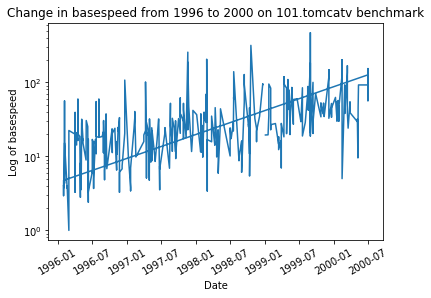

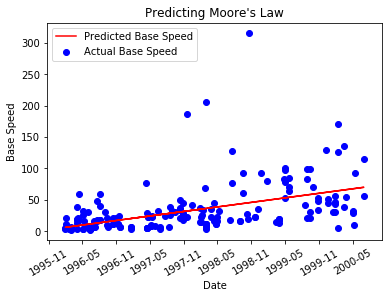

The R^2 score of the linear model is -97.77
The Mean Squared Error of the linear model is 1323.42


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('benchmarks.txt', sep=',', low_memory=False)

######
# Extracting date and basespeed for benchmark '101.tomcatv'

def getDate(testID):
    arr = testID.split('-')
    if len(arr) >= 2:
        date = arr[1]
        if len(date) == 6:
            return datetime.strptime(date, '%y%m%d')
        else:
            return datetime.strptime(date, '%Y%m%d')
    return np.nan

benchname = '101.tomcatv'
benchmark_data = data[data['benchName'] == benchname]
baseData = benchmark_data.iloc[:, [0,2]] # creating dataframe with only testID and basespeed
baseData = baseData.assign(date = baseData.testID.apply(getDate)) # Preferred way of creating new column in pandas.
baseData = baseData.dropna() # Dropping NaN values.

print(baseData.head(5))

#########
# ploting semi-log plot
plt.semilogy(baseData.date, baseData.base)
plt.xlabel('Date')
plt.ylabel('Log of basespeed')
plt.title('Change in basespeed from 1996 to 2000 on 101.tomcatv benchmark')
plt.xticks(rotation=30)
plt.show()


#######
# Creating linear model

x_train, x_test, y_train, y_test = train_test_split(baseData.date.values.reshape(-1,1), 
                                                    baseData.base.values.reshape(-1,1), 
                                                    test_size=0.33)

# Training input data are in date-time format, so converting them into total seconds for training the model
x_train_timestamp = list(map(lambda x:x.astype('datetime64[s]').astype('float'), x_train))
x_test_timestamp = list(map(lambda x:x.astype('datetime64[s]').astype('float'), x_test))

lm = linear_model.LinearRegression()
lm = lm.fit(x_train_timestamp, y_train)
y_pred = lm.predict(x_test_timestamp)
score = lm.score(y_pred, y_test)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the predicted value of linear model against the actual basespeed
plt.plot(x_test, y_pred, color='red', label='Predicted Base Speed')
plt.scatter(x_test, y_test, color='blue', label='Actual Base Speed')
plt.xlabel('Date')
plt.ylabel('Base Speed')
plt.title('Predicting Moore\'s Law')
plt.xticks(rotation=30)
plt.legend()
plt.show()
print('The R^2 score of the linear model is {0:.2f}'.format(score))
print('The Mean Squared Error of the linear model is {0:.2f}'.format(mse))

Moore's law is not holding as the years increase. The rate of increase of base speed is modeled as linear, however to hold the Moore's law the basespeed should be increasing exponentially.
However, the linear model is not extremely accurate as its Mean Squared Error is huge.

# MNIST Digits

No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwritten digits (0-9).

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

- Using Scikit.learn, load the MNIST digits (See here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).
- Plot some of the examples.
- Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.
- Report your error rates on a held out part of the data.
- (Optional) Test your model on the full dataset (available from http://yann.lecun.com/exdb/mnist/)

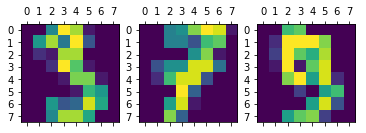

The mean accuracy of the KNN on number 8 and 3 training/testing set is  1.0
The mean accuracy of the KNN on 0,1,2,4,5,6,7,9 data set is  0.0


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

#######
# Loading MNIST digits
digits = datasets.load_digits()

#####
# Plotting Few Images
f, axarr = plt.subplots(1,3)
axarr[0].matshow(digits.images[3])
axarr[1].matshow(digits.images[7])
axarr[2].matshow(digits.images[9])
plt.show()

#######
# Train using two digit classes
trainset = np.concatenate((digits.data[np.where(digits.target == 8)], digits.data[np.where(digits.target == 3)]))
target = np.concatenate((digits.target[np.where(digits.target == 8)], digits.target[np.where(digits.target == 3)]))

x_train, x_test, y_train, y_test = train_test_split(trainset, 
                                                    target, 
                                                    test_size=0.4, random_state=84)


n_neighbours = 10
knn = neighbors.KNeighborsClassifier(n_neighbours)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('The mean accuracy of the KNN on number 8 and 3 training/testing set is ', knn.score(x_test, y_test))


#######
# Testing in the dataset with other numbers except 8 and 3.

X_test = np.concatenate((digits.data[np.where(digits.target == 0)],
                         digits.data[np.where(digits.target == 1)],
                         digits.data[np.where(digits.target == 2)],
                         digits.data[np.where(digits.target == 4)],
                         digits.data[np.where(digits.target == 5)],
                         digits.data[np.where(digits.target == 6)],
                         digits.data[np.where(digits.target == 7)],
                         digits.data[np.where(digits.target == 9)]
                        ))
Y_test = np.concatenate((digits.target[np.where(digits.target == 0)],
                         digits.target[np.where(digits.target == 1)],
                         digits.target[np.where(digits.target == 2)],
                         digits.target[np.where(digits.target == 4)],
                         digits.target[np.where(digits.target == 5)],
                         digits.target[np.where(digits.target == 6)],
                         digits.target[np.where(digits.target == 7)],
                         digits.target[np.where(digits.target == 9)]
                        ))

print('The mean accuracy of the KNN on 0,1,2,4,5,6,7,9 data set is ', knn.score(X_test, Y_test))


# Although the KNN score is 1.0 with number 8 and 3, it is zero with other numbers.
# Since it was trained only using number 8 and 3, it cannot classify other numbers.


In [6]:
# Training using all digits classes, but spliting into training set and test set

x_train, x_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size=0.4, random_state=84)


n_neighbours = 10
knn = neighbors.KNeighborsClassifier(n_neighbours)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('The mean accuracy of the KNN trained on local MNIST dataset is ', knn.score(x_test, y_test))

The mean accuracy of the KNN trained on local MNIST dataset is  0.9749652294853964


In [8]:
## Could not test with the data from the web source as it had 784 pixels instead of 64
## Created a new classifier using training set and tested it with test set.

# Use mlxtend library available at https://rasbt.github.io/mlxtend/

from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='Yann_Lecun_mnist/train-images-idx3-ubyte', 
        labels_path='Yann_Lecun_mnist/train-labels-idx1-ubyte')
                                        

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, random_state=84)

n_neighbours = 10
knn = neighbors.KNeighborsClassifier(n_neighbours)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('The mean accuracy of the KNN is ', knn.score(x_test, y_test))

## Testing on test dataset from the websource
X_web_test, y_web_test = loadlocal_mnist(
        images_path='Yann_Lecun_mnist/t10k-images-idx3-ubyte', 
        labels_path='Yann_Lecun_mnist/t10k-labels-idx1-ubyte')


print('The mean accuracy of the KNN on new testing data from web is ', knn.score(x_web_test, y_web_test))

The mean accuracy of the KNN is  0.9627083333333334


NameError: name 'x_web_test' is not defined

In [9]:
## Testing on test dataset from the websource
X_web_test, y_web_test = loadlocal_mnist(
        images_path='Yann_Lecun_mnist/t10k-images-idx3-ubyte', 
        labels_path='Yann_Lecun_mnist/t10k-labels-idx1-ubyte')


print('The mean accuracy of the KNN on new testing data from web is ', knn.score(X_web_test, y_web_test))

The mean accuracy of the KNN on new testing data from web is  0.9603
